![Hack the feed insights banner](images/hackthefeed.png)

# Hack the Feed: Insights from Social Media Data

**Author:** Aregbesola Samuel

Playhouse Communication stands as a prominent digital marketing agency in Nigeria, known for merging design and media strategy with state-of-the-art technological innovations to transform the landscape of marketing. Their clientele includes both international industry giants and agile small to medium-sized enterprises, all of whom are reshaping their respective fields.

In this project we will try to generate game-changing insights for a high-profile client using exclusive social media data.

In the [data_cleaning workbook](data_cleaning.ipynb), the raw data was processed and cleaned for all four social media platforms. 

This python workbook contains codes used to explore the datasets and generate insights. 

---

The analysis will be split into two parts
1. A combined analysis for all the social media platforms
2. Individual analysis for each platform 

In [73]:
# imports
import pandas as pd # library for data manipulation and analysis
import numpy as np # library for scientific computing
import matplotlib.pyplot as plt # library for visualizing data
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import seaborn as sns # library for visualizing data

import warnings # library to ignore warnings
warnings.filterwarnings('ignore')

# set option to display all the columns of the dataframe
pd.set_option('display.max_columns', None)

In [3]:
# import helper functions
from helper_functions import feature_engineering_functions, plotting_functions, time_series_functions

In [4]:
# import data
facebook = pd.read_csv('./data/facebook_clean.csv')
twitter = pd.read_csv('./data/twitter_clean.csv')
instagram = pd.read_csv('./data/instagram_clean.csv')
linkedin = pd.read_csv('./data/linkedin_clean.csv')

In [5]:
# Check dataframe dimensions
def print_df_shapes(dfs):
    for name, df in dfs.items():
        print(f"{name} ({df.shape[0]}, {df.shape[1]})")

# dataframes dictionary
dataframes = {'facebook': facebook, 'instagram': instagram, 'linkedin': linkedin, 'twitter': twitter}

print_df_shapes(dataframes)

facebook (8893, 45)
instagram (8516, 15)
linkedin (6332, 16)
twitter (7841, 26)


In [6]:
# Create a copy of the dataframes
facebook_copy = facebook.copy()
instagram_copy = instagram.copy()
linkedin_copy = linkedin.copy()
twitter_copy = twitter.copy()

## Combined Social Media Analysis

---
### Data gathering

In [7]:
# return all similar columns in the four dataframes
def similar_columns(df1, df2, df3, df4):
    df1_cols = df1.columns
    df2_cols = df2.columns
    df3_cols = df3.columns
    df4_cols = df4.columns
    similar_cols = []
    for col in df1_cols:
        if col in df2_cols and col in df3_cols and col in df4_cols:
            similar_cols.append(col)
    return similar_cols

In [8]:
selected_columns = similar_columns(facebook, instagram, twitter, linkedin)
print(selected_columns)

['Date', 'Network', 'Content Type', 'Sent by', 'Post', 'Impressions', 'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes', 'Comments']


In [9]:
# Select similar columns in the four dataframes
facebook_select = facebook[selected_columns]
twitter_select = twitter[selected_columns]
instagram_select = instagram[selected_columns]
linkedin_select = linkedin[selected_columns]

In [10]:
# Concatenate the four dataframes
social_media = pd.concat([facebook_select, twitter_select, instagram_select, linkedin_select]).reset_index(drop = True)

---
### Exploratory Data Analysis

In [11]:
#view first two rows of the dataframe
social_media.head(2)

,Date,Network,Content Type,Sent by,Post,Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments
0,2022-12-17 17:08:00,Facebook,Video,Damilare Oyekanmi,"We celebrated recently with Novare, one of our...",207378.0,0.49,1024.0,179.0,176.0,59.0
1,2019-05-04 10:01:00,Facebook,Photo,Unknown,N5k can get you started today. Call 01 280 126...,125784.0,4.67,5876.0,762.0,747.0,572.0


In [12]:
# check dimension of the dataframe
print('Rows:', social_media.shape[0])
print('Columns:', social_media.shape[1])

Rows: 31582
Columns: 11


In [13]:
# check the data types of the columns
pd.DataFrame(social_media.dtypes, columns=['data_type'])

,data_type
Date,object
Network,object
Content Type,object
Sent by,object
Post,object
Impressions,float64
Engagement Rate (per Impression),float64
Engagements,float64
Reactions,float64
Likes,float64


In [14]:
# convert the date column to datetime
social_media['Date'] = pd.to_datetime(social_media['Date'])

In [15]:
# Convert 'Network', 'Content Type'  and 'Sent by' to categorical
social_media['Network'] = social_media['Network'].astype('category')
social_media['Content Type'] = social_media['Content Type'].astype('category')
social_media['Sent by'] = social_media['Sent by'].astype('category')

In [16]:
# check for missing values
social_media.isnull().sum()

Date                                0
Network                             0
Content Type                        0
Sent by                             0
Post                                0
Impressions                         0
Engagement Rate (per Impression)    0
Engagements                         0
Reactions                           0
Likes                               0
Comments                            0
dtype: int64

In [17]:
# display summary statistics
social_media.describe()

,Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments
count,31582.000000,31582.000000,31582.000000,31582.000000,31582.000000,31582.000000
mean,3271.546482,13.658286,132.893262,61.307359,60.524983,9.964727
std,4699.463223,227.574161,761.147717,704.604256,702.863936,36.054046
min,0.000000,-1.200000,-23.000000,-103.000000,-103.000000,-16.000000
25%,1035.000000,1.830000,28.000000,10.000000,10.000000,0.000000
50%,2059.000000,2.610000,58.000000,23.000000,23.000000,2.000000
75%,3764.000000,3.650000,114.000000,55.000000,55.000000,9.000000
max,207378.000000,14200.000000,72474.000000,70484.000000,70244.000000,1552.000000


<AxesSubplot:>

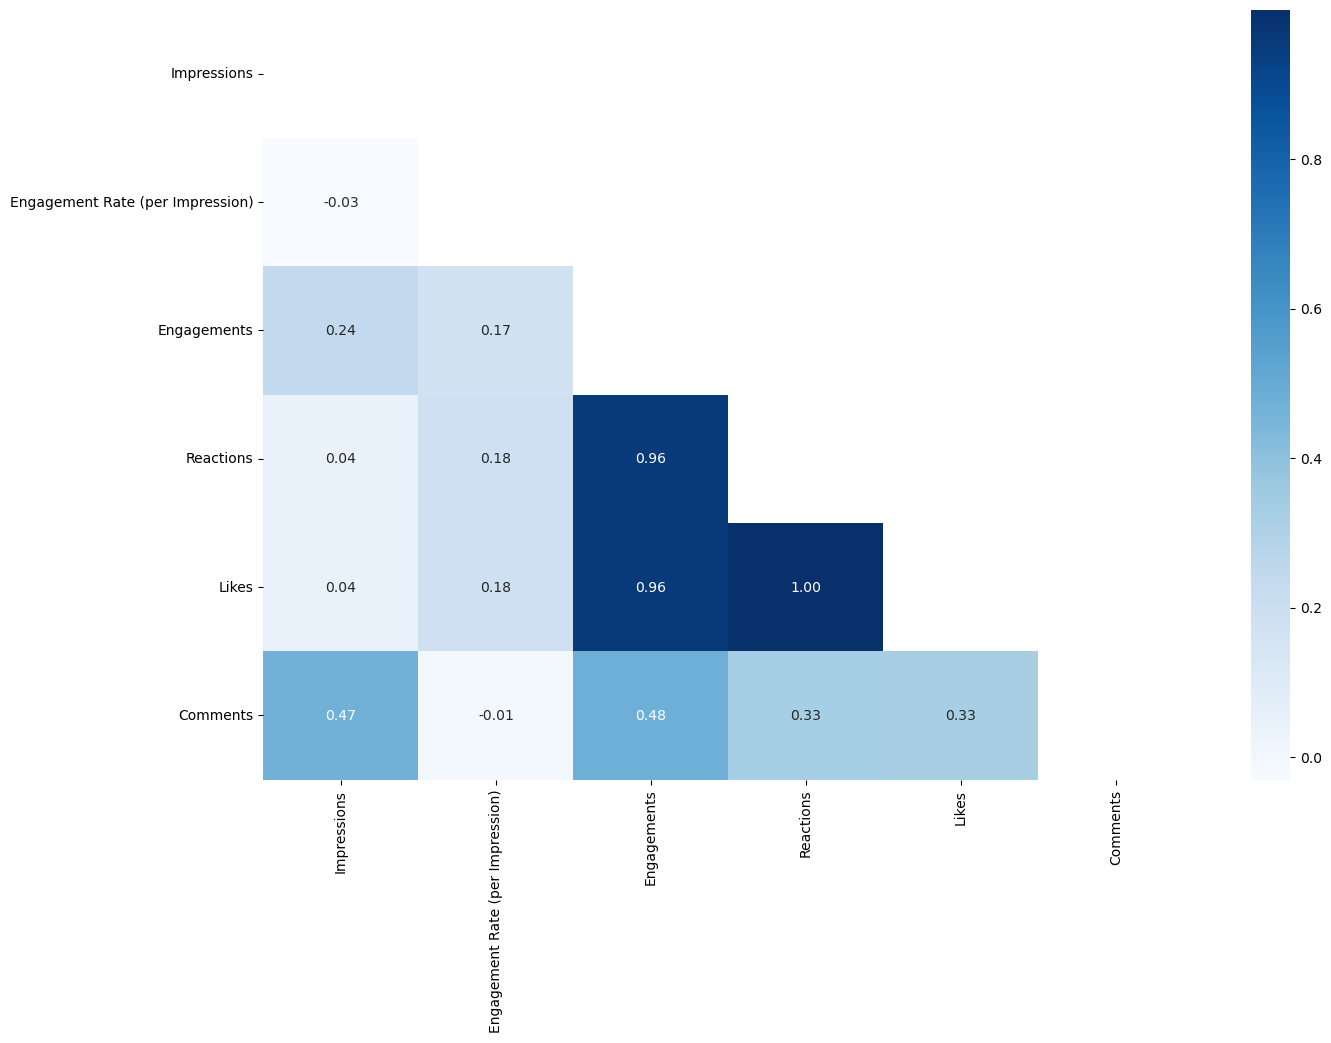

In [18]:
# check correlation between variables
corr = social_media.corr()

plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(corr,annot=True,fmt=".2f", mask=mask,cmap="Blues")

In [19]:
# Check metrics by content type
(social_media.groupby('Content Type')
[['Impressions', 'Engagements', 'Engagement Rate (per Impression)', 'Reactions', 'Likes', 'Comments']].mean()
.sort_values('Impressions', ascending=False))

,Impressions,Engagements,Engagement Rate (per Impression),Reactions,Likes,Comments
Content Type,,,,,,
Poll,22357.000000,615.000000,2.730000,15.500000,15.500000,2.500000
Photo,3447.588669,138.238661,15.497569,64.441698,63.613818,10.254826
Text,3437.383935,130.682388,2.576035,19.884304,19.342668,13.710391
Carousel,2455.563187,93.072802,3.595549,83.265110,83.265110,6.373626
Link,2320.452632,76.456842,3.970547,22.240000,21.442105,3.850526
Video,2222.966298,110.650807,8.023549,55.371000,54.664684,8.001133
Document,1438.000000,260.000000,18.080000,9.000000,9.000000,0.000000


In [20]:
# Check most active content creators minus unknown
pd.DataFrame(social_media[social_media['Sent by'] != 'Unknown']['Sent by'].value_counts().head(5))

,Sent by
Blessing Ubah,5586
Sophia Amuka,5155
Aramide Salami,2839
Damilare Oyekanmi,1900
Kemi Amoo,776


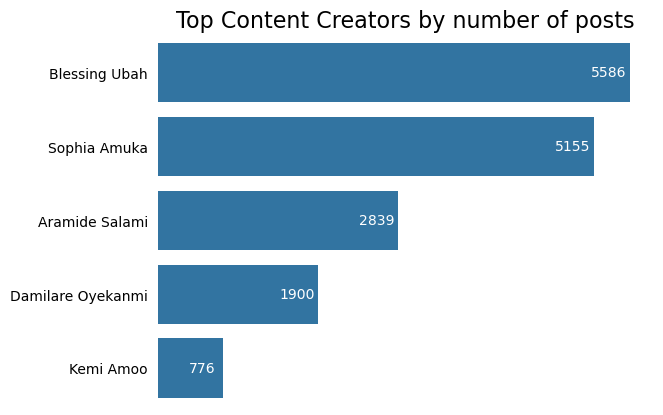

In [44]:
# set the color palette
color = sns.color_palette()[0]

# create a countplot of the 'Sent by' column, excluding 'Unknown' values
ax = sns.countplot(data=social_media[social_media['Sent by'] != 'Unknown'],
                   y='Sent by', 
                   # order the bars by count, excluding the most frequent value ('Unknown')
                   order=social_media['Sent by'].value_counts().iloc[1:6].index, 
                   color=color)

# add annotations to each bar with the count value
for p in ax.patches:
    width = p.get_width()  # Get the width of the bar
    ax.annotate(f'{int(width)}',              # Format the count value
                (width - 250, p.get_y() + p.get_height() / 2),  # Adjust coordinates
                ha='center',                     # Horizontal alignment
                va='center',                     # Vertical alignment
                color='white'),                   # Text color

# set the x and y labels to None, and remove the x tick marks
ax.set(xlabel=None, ylabel=None, xticks=[])
sns.despine(left=True, bottom=True);

# Remove tick marks on the y-axis
plt.tick_params(left = False)

# Add title
plt.title('Top Content Creators by number of posts', fontsize = 16)

# display the plot
plt.show()

In [60]:
# Check metrics by content creators
(social_media.groupby('Sent by')
[['Impressions', 'Engagements', 'Engagement Rate (per Impression)', 'Reactions', 'Likes', 'Comments']].mean()
.sort_values('Impressions', ascending=False)).head(6)

,Impressions,Engagements,Engagement Rate (per Impression),Reactions,Likes,Comments
Sent by,,,,,,
Unknown,4071.492928,184.729228,23.948349,90.006579,88.690941,12.180449
Damilare Oyekanmi,4049.872105,135.034211,9.395653,35.570000,34.260000,15.027368
Aramide Salami,3281.681578,118.145474,4.184625,72.553716,72.110250,7.967594
Sophia Amuka,2610.592435,91.070223,3.487224,22.250824,22.181183,6.634918
Kemi Amoo,1878.498711,62.853093,3.076379,29.145619,29.020619,6.139175
Blessing Ubah,1667.188149,48.251343,3.039977,27.514142,27.429108,6.888113


In [61]:
# check metrics by network
(social_media.groupby('Network')
[['Impressions', 'Engagements', 'Engagement Rate (per Impression)', 'Reactions', 'Likes', 'Comments']].mean())

,Impressions,Engagements,Engagement Rate (per Impression),Reactions,Likes,Comments
Network,,,,,,
Facebook,5857.725177,231.683234,4.551597,91.886990,89.108512,20.538738
Instagram,2273.855214,112.031353,37.886264,101.083138,101.083138,8.898779
LinkedIn,1082.389415,50.458452,7.175591,15.776777,15.776777,1.155134
Twitter,3189.083153,110.087489,2.910116,20.212728,20.212728,6.245759


In [71]:
# check metrics by content type
(social_media.groupby('Content Type')
[['Impressions', 'Engagements', 'Engagement Rate (per Impression)', 'Reactions', 'Likes', 'Comments']].mean())

,Impressions,Engagements,Engagement Rate (per Impression),Reactions,Likes,Comments
Content Type,,,,,,
Carousel,2455.563187,93.072802,3.595549,83.265110,83.265110,6.373626
Document,1438.000000,260.000000,18.080000,9.000000,9.000000,0.000000
Link,2320.452632,76.456842,3.970547,22.240000,21.442105,3.850526
Photo,3447.588669,138.238661,15.497569,64.441698,63.613818,10.254826
Poll,22357.000000,615.000000,2.730000,15.500000,15.500000,2.500000
Text,3437.383935,130.682388,2.576035,19.884304,19.342668,13.710391
Video,2222.966298,110.650807,8.023549,55.371000,54.664684,8.001133



---
### Feature Engineering

In this section we will create time based features including: 
* year
* month
* day of week
* hour
* time of day
* is weekend?

In [57]:
# setup feature engineering functions for the social media data
sm = feature_engineering_functions(social_media)

In [58]:
# create new columns for time series analysis
social_media = sm.create_time_features(column='Date')

In [59]:
#check new columns 
print(social_media.columns[-6:])

Index(['year', 'month', 'day_of_week', 'hour', 'time_of_day', 'is_weekend'], dtype='object')


In [60]:
social_media[['year', 'month', 'day_of_week', 'hour', 'time_of_day', 'is_weekend']].head()

,year,month,day_of_week,hour,time_of_day,is_weekend
0,2022,December,Saturday,17,evening,1
1,2019,May,Saturday,10,morning,1
2,2020,June,Tuesday,21,night,0
3,2022,May,Monday,10,morning,0
4,2021,July,Sunday,10,morning,1


In [117]:
# create has_hashtag column
social_media['has_hashtag'] = social_media.Post.apply(lambda x: True if '#' in x else False)

In [ ]:
# check number of hashtag features
column.apply(lambda x: len([c for c in x if c == '#'])

In [61]:
# save the social media data
social_media.to_csv('./data/social_media_data.csv', index=False)

---

In [64]:
#Check frequency of posts by weekday
pd.DataFrame(social_media['day_of_week'].value_counts().sort_values(ascending=False))

,day_of_week
Wednesday,5596
Friday,5100
Thursday,4922
Monday,4664
Tuesday,4609
Saturday,4017
Sunday,2674


In [66]:
#Check frequency of posts by year
pd.DataFrame(social_media['year'].value_counts().sort_values(ascending=False))

,year
2022,6318
2020,5710
2021,4771
2019,3651
2018,3621
2023,2976
2017,2694
2016,1538
2015,264
2014,37


In [ ]:
#Check frequency of posts by year
pd.DataFrame(social_media['year'].value_counts().sort_values(ascending=False))

In [67]:
# Check frequency of posts by month
pd.DataFrame(social_media['month'].value_counts().sort_values(ascending=False))

,month
May,3118
March,2879
February,2837
April,2757
October,2689
November,2686
June,2589
September,2566
December,2415
July,2403


In [69]:
# Compare performance of posts by weekday and weekend
(social_media.groupby('time_of_day')
[['Impressions', 'Engagements', 'Engagement Rate (per Impression)', 'Reactions', 'Likes', 'Comments']].mean())

,Impressions,Engagements,Engagement Rate (per Impression),Reactions,Likes,Comments
time_of_day,,,,,,
afternoon,3052.911776,122.432565,10.412098,53.382672,52.726934,9.304665
evening,3367.281615,132.617351,11.208859,58.968453,58.059287,9.908893
morning,3138.984722,127.588066,20.443435,61.813971,61.111271,9.933891
night,6149.464824,291.458961,3.934372,155.103853,153.068677,17.557789


In [70]:
# Compare performance of posts by weekday and weekend
(social_media.groupby('is_weekend')
[['Impressions', 'Engagements', 'Engagement Rate (per Impression)', 'Reactions', 'Likes', 'Comments']].mean())

,Impressions,Engagements,Engagement Rate (per Impression),Reactions,Likes,Comments
is_weekend,,,,,,
0,3214.159134,131.819172,12.454449,59.950665,59.165401,9.995259
1,3485.031535,136.888955,18.136643,66.354357,65.582723,9.851143


In [102]:
# check frequency of posts by hour
pd.DataFrame(social_media['hour'].value_counts().sort_values(ascending=False))

,hour
10,3886
12,3132
17,3095
15,2625
13,2412
14,2356
11,2280
9,2168
16,2102
18,2098


---
### Twitter Data Analysis

In [ ]:
# click-through rate analysis
twitter[twitter['Has Link'] 

In [100]:
### Twitter click through rate analysis
# check the click through rate by network
twitter[twitter]

,Date,Network,Content Type,Sent by,Post,Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,Follows from Post,Unfollows from Post,Media Views,Has Link
0,2023-07-13 10:57:00,Twitter,Photo,Sophia Amuka,Your money should not be a gamble. Before you ...,445.0,345718.0,3.60,16.0,4.0,4.0,2.0,1.0,0.00,0.0,9.0,9.0,1.0,0.0,7.0,1.0,0.0,0.0,0.0,1.0,0
1,2023-07-12 20:03:00,Twitter,Text,Blessing Ubah,"What skill (s) do you have, that no one ever t...",2961.0,347102.0,1.76,52.0,11.0,11.0,20.0,3.0,0.00,0.0,18.0,18.0,0.0,1.0,12.0,5.0,0.0,0.0,0.0,0.0,0
2,2023-07-12 19:00:00,Twitter,Photo,Blessing Ubah,Sade was able to acquire a home loan and make ...,850.0,347594.0,4.24,36.0,4.0,4.0,1.0,3.0,0.82,7.0,21.0,28.0,11.0,0.0,10.0,0.0,0.0,0.0,0.0,11.0,1
3,2023-07-12 18:20:00,Twitter,Photo,Blessing Ubah,Here are some mistakes you shouldn’t make duri...,1499.0,349169.0,3.40,51.0,13.0,13.0,3.0,5.0,0.00,0.0,30.0,30.0,24.0,0.0,5.0,1.0,0.0,0.0,0.0,24.0,0
4,2023-07-11 12:50:00,Twitter,Photo,Sophia Amuka,Safeguard every aspect of your operations with...,1184.0,345653.0,1.52,18.0,7.0,7.0,3.0,1.0,0.00,0.0,7.0,7.0,3.0,0.0,1.0,3.0,0.0,0.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7836,2014-10-09 16:02:00,Twitter,Text,Unknown,Welcome everyone to another #MovingForwardNG s...,791.0,217770.0,0.25,2.0,0.0,0.0,0.0,0.0,0.00,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
7837,2014-10-09 15:00:00,Twitter,Text,Unknown,1 hour to the #MovingForwardNG conversation wi...,2397.0,721872.0,0.67,16.0,0.0,0.0,0.0,0.0,0.00,0.0,16.0,16.0,0.0,2.0,11.0,3.0,0.0,0.0,0.0,0.0,0
7838,2014-10-09 14:00:00,Twitter,Text,Unknown,Join the #MovingForwardNG conversation from 4p...,1008.0,217770.0,0.20,2.0,0.0,0.0,0.0,0.0,0.00,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0
7839,2014-10-09 12:00:00,Twitter,Text,Unknown,"Join us in conversation with @VusiThembekwayo,...",2192.0,721872.0,0.41,9.0,0.0,0.0,0.0,0.0,0.00,0.0,9.0,9.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0


### Time Series Analysis

In [76]:
#Time Series Imports
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima


In [74]:
def plot_line_plot(df, y_label):

    '''
    This function produces a customized line plot of the time series monthly data.
    '''
    
    fig, ax = plt.subplots(figsize = (6,4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator())

    ax.plot(df['Year'], new_df['Values'])
    plt.xticks(rotation=45)

    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)

    ax.set_ylabel(y_label)
    ax.set_title('Trend of ' + str(y_label))


    # Show the plot
    plt.show()

In [77]:
# function for adfuller test
def adfuller_test(df, column):
    result = adfuller(df[column])
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [78]:
# function to forecast time series data
def forecast_time_series(df, column, periods):
    # fit model
    model = auto_arima(df[column], trace=True, error_action='ignore', suppress_warnings=True)
    model.fit(df[column])
    # make forecast
    forecast = model.predict(n_periods=periods)
    # plot forecast 
    plt.plot(forecast)
    plt.show()
    return forecast

#### Facebook Time Series

---
### Facebook Advertisement analysis

This section aims to check the performance of promoted content against non-promoted content.

Of all the platforms only facebook has promoted content. i.e. Some impressions defer from organic impressions

In [79]:
post_with_ads = facebook[(facebook['Impressions'] != facebook['Organic Impressions'])]

In [80]:
post_with_ads.head(2)

,Date,Network,Content Type,Sent by,Post,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,Fan Organic Impressions,Non-fan Impressions,Non-fan Organic Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Fan Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All),Answers,Negative Feedback,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Other Post Clicks,Unique Negative Feedback
12,2017-09-17 11:37:00,Facebook,Photo,Unknown,"This EPL #Supersunday, it's the Blues against ...",95300.0,59484.0,35816.0,59484.0,57181.0,57181.0,38119.0,2303.0,56094.0,38717.0,18384.0,38717.0,35590.0,5.49,9.32,5230.0,641.0,631.0,6.0,0.0,4.0,0.0,0.0,1050.0,96.0,0.0,3443.0,3443.0,0.0,7.0,2431.0,1974.0,1398.0,620.0,955.0,95.0,0.0,1948.0,1628.0,6.0
15,2019-09-03 11:43:00,Facebook,Photo,Aramide Salami,Every human life is a precious gift to humanit...,70855.0,70787.0,35336.0,35449.0,37836.0,37836.0,33019.0,32951.0,52185.0,52185.0,24829.0,29127.0,30207.0,5.25,7.12,3717.0,669.0,622.0,23.0,2.0,0.0,2.0,20.0,186.0,187.0,0.0,2675.0,2675.0,0.0,1.0,2573.0,1591.0,852.0,649.0,120.0,170.0,0.0,1993.0,1679.0,1.0


In [81]:
print(f'There are {post_with_ads.shape[0]} promotted with ads')

There are 244 promotted with ads


In [85]:
# convert the date column to datetime
post_with_ads['Date'] = pd.to_datetime(post_with_ads['Date'])

In [82]:
post_without_ads = facebook[(facebook['Impressions'] == facebook['Organic Impressions'])]

In [89]:
print(f'There are {post_without_ads.shape[0]} posts without ads')

There are 8649 posts without ads


In [86]:
# check post with ads by year
post_with_ads['year'] = post_with_ads['Date'].dt.year

In [88]:
pd.DataFrame(post_with_ads['year'].value_counts())

,year
2017,205
2019,13
2018,12
2016,7
2015,3
2020,2
2022,1
2021,1


In [90]:
post_with_ads['Content Type'].value_counts() 

Photo    210
Video     27
Link       6
Text       1
Name: Content Type, dtype: int64

In [92]:
#compare ctr of post with ads and post without ads
post_with_ads['Click-Through Rate'].mean()

0.0313934426229508

In [94]:
#compare ctr of post with ads and post without ads
post_without_ads['Click-Through Rate'].mean()

0.18127991675338198

In [98]:
# check post with ads CTR by content type
pd.DataFrame(post_with_ads.groupby('Content Type')['Click-Through Rate'].mean())

,Click-Through Rate
Content Type,
Link,0.345000
Photo,0.025571
Text,0.000000
Video,0.008148


In [99]:
# check post without ads CTR by content type
pd.DataFrame(post_without_ads.groupby('Content Type')['Click-Through Rate'].mean())

,Click-Through Rate
Content Type,
Link,0.395682
Photo,0.202569
Text,0.009562
Video,0.034501


In [95]:
# compare engagement of post with ads and post with ads
pd.DataFrame(post_with_ads[['Engagement Rate (per Impression)', 'Engagement Rate (per Reach)']].mean())

,0
Engagement Rate (per Impression),6.646311
Engagement Rate (per Reach),9.463443


In [96]:
# compare engagement of post with ads and post without ads
pd.DataFrame(post_without_ads[['Engagement Rate (per Impression)', 'Engagement Rate (per Reach)']].mean())

,0
Engagement Rate (per Impression),4.492502
Engagement Rate (per Reach),4.771437
